# Summer of Code - Artificial Intelligence

## Week 10: Deep Learning

### Day 01: Recurrent Neural Networks

In this notebook, we will learn the theoretical foundations of **Recurrent Neural Networks (RNNs)** using PyTorch.


# Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are a class of neural networks designed to handle sequential data.


## Recurrent Neurons

A recurrent neuron is just like a regular neuron, but it has an additional connection that feeds its output back into itself for the next time step.

<img src="images/recurrent_neuron.png" alt="Recurrent Neuron" width="600"/>


## Reccurrent Layer

A recurrent layer consists of multiple recurrent neurons. Each neuron in the layer receives input from the previous layer and also from its own output at the previous time step.

<img src="images/r_layer.png" alt="Recurrent Layer" width="600"/>


### Memory Cells

Since the output of a recurrent neuron is fed back into itself, it can retain information over time. This allows RNNs to have a form of memory. Memory cells are part of neural networks that retain information about previous inputs.

In simple architectures, the output of the recurrent neuron itself acts as the memory cell. More complex architectures, like LSTMs and GRUs, have dedicated memory cells that can store information for longer periods.

<img src="images/memory_cell.png" alt="Memory Cells" width="600"/>


## Input and Output Sequences

We can use RNNs to process sequences of data. The input to an RNN is typically a sequence of vectors, and the output can vary depending on the task:


### Sequence to Vector

- The RNN processes a sequence of inputs and produces a single output vector.

<img src="images/seq_to_vec.png" alt="Sequence to Vector" width="500"/>

Example: Sentiment analysis, where the input is a sequence of words and the output is a sentiment score.


### Sequence to Sequence

- The RNN processes a sequence of inputs and produces a sequence of outputs.

<img src="images/seq_to_seq.png" alt="Sequence to Sequence" width="600"/>

Example: Forecast weather data, where the input is a sequence of past weather measurements and the output is a sequence of future predictions.


### Vector to Sequence

- The RNN takes a single input vector and produces a sequence of outputs.

<img src="images/vec_to_seq.png" alt="Vector to Sequence" width="600"/>

Example: Image captioning, where the input is an image feature vector and the output is a sequence of words describing the image.


### Encoder Decoder Architecture

- The encoder processes the input sequence and compresses the information into a context vector. The decoder then takes this context vector and generates the output sequence.

<img src="images/encoder_decoder.png" alt="Encoder Decoder Architecture" width="600"/>

Example: Machine translation, where the encoder processes a sentence in one language and the decoder generates the corresponding sentence in another language.


# Training RNNs

Training RNNs involves backpropagation through time (BPTT), which is an extension of the standard backpropagation algorithm used for feedforward neural networks. BPTT unfolds the RNN over time and computes gradients for each time step, allowing the network to learn from sequential data.

<img src="images/bptt.png" alt="Backpropagation Through Time" width="600"/>


# Sentiment Analysis

A sequence to vector problem


## IMDB Dataset

This dataset contains 50,000 movie reviews labeled as positive or negative.


In [1]:
from datasets import load_dataset

# Load IMDB dataset
print("Loading IMDB dataset...")
dataset = load_dataset("imdb")
dataset

Loading IMDB dataset...


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [2]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [3]:
dataset['train'][1]

{'text': '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, 

In [4]:
# Extract train and test data
train_data = [(item["label"], item["text"]) for item in dataset["train"]]
test_data = [(item["label"], item["text"]) for item in dataset["test"]]
print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")

Training samples: 25000
Test samples: 25000


In [5]:
test_data[0]

(0,
 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as they

## Preprocessing

Before feeding text into our RNN, we need to preprocess it:

1. **Lowercase**: Convert all text to lowercase for consistency
2. **Remove special characters**: Keep only alphabetic characters and spaces
3. **Tokenization**: Split text into individual words (tokens)

In [6]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Simple tokenization
    return tokens

In [7]:

# Test preprocessing
sample_text = train_data[0][1]

tokens = preprocess_text(sample_text)
print(f"Original text: {sample_text[:100]}...")
print(f"\nTokens (first 20): {tokens[:20]}")
print(f"Total tokens: {len(tokens)}")

Original text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it w...

Tokens (first 20): ['i', 'rented', 'i', 'am', 'curiousyellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when', 'it', 'was']
Total tokens: 288


## Build Vocabulary

A vocabulary is a mapping from words to unique integer indices. Neural networks work with numbers, not words, so we need to convert each word to a unique number.

We'll build our vocabulary from the training data and include special tokens:

- `<PAD>`: Padding token (index 0) - used to make all sequences the same length
- `<UNK>`: Unknown token (index 1) - used for words not in our vocabulary


In [8]:
from collections import Counter


def build_vocabulary(data, max_vocab_size=10000):
    word_counts = Counter()
    for i, (label, text) in enumerate(data):
        tokens = preprocess_text(text)
        word_counts.update(tokens)

    most_common = word_counts.most_common(max_vocab_size - 2)

    # Create vocabulary with special tokens
    vocab = {"<PAD>": 0, "<UNK>": 1}

    # Add most common words
    for word, _ in most_common:
        vocab[word] = len(vocab)

    return vocab, word_counts


# Build vocabulary from training data
vocab, word_counts = build_vocabulary(train_data, max_vocab_size=10000)
print(f"Vocabulary size: {len(vocab)}")
print(f"\nFirst 10 words in vocabulary:")
for word, idx in list(vocab.items())[:10]:
    print(f"  {word}: {idx}")

print(f"\nMost common words:")
for word, count in word_counts.most_common(10):
    print(f"  {word}: {count}")

Vocabulary size: 10000

First 10 words in vocabulary:
  <PAD>: 0
  <UNK>: 1
  the: 2
  and: 3
  a: 4
  of: 5
  to: 6
  is: 7
  in: 8
  it: 9

Most common words:
  the: 334706
  and: 162227
  a: 161941
  of: 145326
  to: 135042
  is: 106852
  in: 93028
  it: 77101
  i: 75717
  this: 75190


## Text to Sequence Conversion

Convert text into sequences of integers using our vocabulary. Each word gets replaced by its index in the vocabulary.

We also need to handle sequences of different lengths by:

- **Truncating**: Cut sequences longer than max_length
- **Padding**: Add `<PAD>` tokens to sequences shorter than max_length

This ensures all sequences have the same length, which is required for batch processing.


In [9]:
def text_to_sequence(text, vocab, max_length=200):
    tokens = preprocess_text(text)
    sequence = [vocab.get(token, vocab["<UNK>"]) for token in tokens]
    if len(sequence) > max_length:
        sequence = sequence[:max_length]
    else:
        sequence = sequence + [vocab["<PAD>"]] * (max_length - len(sequence))

    return sequence


# Test the conversion
sample_text = train_data[0][1]
sequence = text_to_sequence(sample_text, vocab, max_length=200)
print(f"Original text length: {len(preprocess_text(sample_text))} words")
print(f"Sequence length: {len(sequence)}")
print(f"First 20 indices: {sequence[:20]}")
print(f"Last 20 indices (should be padding): {sequence[-20:]}")

Original text length: 288 words
Sequence length: 200
First 20 indices: [10, 1533, 10, 237, 1, 36, 56, 393, 1148, 80, 5, 32, 2, 7200, 12, 3309, 9, 51, 9, 14]
Last 20 indices (should be padding): [4578, 131, 56, 1, 348, 160, 9, 1575, 8, 638, 392, 3, 1006, 24, 4, 646, 1, 8, 3815, 443]


## Custom Dataset Class

PyTorch's `Dataset` class provides a standard way to load and process data. We'll create a custom dataset that:

1. Stores our reviews and labels
2. Converts text to sequences when accessed
3. Returns tensors ready for training

In [10]:
import torch
from torch.utils.data import Dataset


class SentimentDataset(Dataset):
    """
    Custom Dataset for sentiment analysis.
    """

    def __init__(self, data, vocab, max_length=200):
        self.data = data
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        """Return the number of samples in the dataset."""
        return len(self.data)

    def __getitem__(self, idx):
        """
        Get a single sample.

        Returns:
            sequence (tensor): Input sequence of shape (max_length,)
            label (tensor): Label (0 or 1)
        """
        label, text = self.data[idx]

        # Convert text to sequence
        sequence = text_to_sequence(text, self.vocab, self.max_length)

        return torch.tensor(sequence, dtype=torch.long), torch.tensor(
            label, dtype=torch.long
        )


# Create datasets
train_dataset = SentimentDataset(train_data, vocab, max_length=200)
test_dataset = SentimentDataset(test_data, vocab, max_length=200)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Test the dataset
sequence, label = train_dataset[0]
print(f"\nSample shape: {sequence.shape}")
print(f"Label: {label.item()} (0=negative, 1=positive)")

Training samples: 25000
Test samples: 25000

Sample shape: torch.Size([200])
Label: 0 (0=negative, 1=positive)


## DataLoaders

In [11]:
from torch.utils.data import DataLoader


# Hyperparameters
BATCH_SIZE = 64

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Number of training batches: 391
Number of test batches: 391


## RNN Model

Now we'll build our sentiment classifier using a simple RNN architecture. The model consists of:

1. **Embedding Layer**: Converts word indices to dense vectors
2. **RNN Layer**: Processes the sequence and captures temporal dependencies
3. **Fully Connected Layer**: Maps the RNN output to sentiment classes

## Enhanced RNN Architecture

We've built a **strong RNN-based model** using only `nn.RNN` (no LSTM/GRU) with the following improvements:

### Key Architectural Features:

1. **Deep RNN Stack**: 4 layers with 256 hidden units
2. **Multi-Pooling Strategy**: Combines last output + mean pooling + max pooling
3. **Layer Normalization**: Better gradient flow through time
4. **Deep Classifier**: 3-layer output network with BatchNorm
5. **Orthogonal Weight Initialization**: Prevents gradient issues
6. **Gradient Clipping**: Handles exploding gradients
7. **Embedding Dropout**: Reduces overfitting on word embeddings

This architecture maximizes RNN performance without using LSTM cells!

In [ ]:
from torch import nn


class SentimentRNN(nn.Module):
    """
    RNN for sentiment classification (Sequence-to-Vector).
    """

    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        num_layers=3,
        dropout=0.3,
    ):
        super(SentimentRNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.embedding_dropout = nn.Dropout(0.2)
        self.rnn = nn.RNN(
            embedding_dim,
            hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
        )
        self.layer_norm = nn.LayerNorm(hidden_dim)

        # Deep output classifier with batch normalization
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout * 0.5),
            nn.Linear(hidden_dim // 2, output_dim),
        )

    def forward(self, x):
        # x shape: (batch_size, seq_length)
        embedded = self.embedding(x)
        embedded = self.embedding_dropout(embedded)
        rnn_output, hidden = self.rnn(embedded)
        rnn_output = self.layer_norm(rnn_output)
        rnn_output = rnn_output[:, -1, :]

        # Deep classifier
        logits = self.classifier(rnn_output)

        return logits

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model hyperparameters - Optimized for strong RNN performance
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 256
HIDDEN_DIM = 256
OUTPUT_DIM = 2
NUM_LAYERS = 4
DROPOUT = 0.4

# Create model
model = SentimentRNN(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
    num_layers=NUM_LAYERS,
    dropout=DROPOUT,
)
model = model.to(device)

print(f"Model Configuration:")
print(f"  - Vocabulary Size: {VOCAB_SIZE}")
print(f"  - Embedding Dimension: {EMBEDDING_DIM}")
print(f"  - Hidden Dimension: {HIDDEN_DIM}")
print(f"  - Number of RNN Layers: {NUM_LAYERS}")
print(f"  - Dropout Rate: {DROPOUT}")
print(f"  - Device: {device}")

Model Configuration:
  - Vocabulary Size: 10000
  - Embedding Dimension: 256
  - Hidden Dimension: 256
  - Number of RNN Layers: 4
  - Dropout Rate: 0.4
  - Device: cuda


In [39]:
from torchinfo import summary

input_sample = torch.zeros(BATCH_SIZE, 200, dtype=torch.long).to(device)
summary(model, input_data=input_sample)

Layer (type:depth-idx)                   Output Shape              Param #
SentimentRNN                             [64, 2]                   --
├─Embedding: 1-1                         [64, 200, 256]            2,560,000
├─Dropout: 1-2                           [64, 200, 256]            --
├─RNN: 1-3                               [64, 200, 256]            526,336
├─LayerNorm: 1-4                         [64, 200, 256]            512
├─Sequential: 1-5                        [64, 2]                   --
│    └─Linear: 2-1                       [64, 256]                 65,792
│    └─BatchNorm1d: 2-2                  [64, 256]                 512
│    └─ReLU: 2-3                         [64, 256]                 --
│    └─Dropout: 2-4                      [64, 256]                 --
│    └─Linear: 2-5                       [64, 128]                 32,896
│    └─BatchNorm1d: 2-6                  [64, 128]                 256
│    └─ReLU: 2-7                         [64, 128]            

## Loss Function and Optimizer

In [40]:
from torch import optim

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer - Adam works better than SGD for RNNs
LEARNING_RATE = 0.001
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

# Learning rate scheduler for better convergence
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=2,
)

print(f"Optimizer: Adam (lr={LEARNING_RATE}, weight_decay=1e-5)")
print(f"Scheduler: ReduceLROnPlateau (factor=0.5, patience=2)")

Optimizer: Adam (lr=0.001, weight_decay=1e-5)
Scheduler: ReduceLROnPlateau (factor=0.5, patience=2)


## Train Epoch

In [ ]:
def train_epoch(model, dataloader, criterion, optimizer, device, clip_grad=1.0):
    model.train()  # Set model to training mode

    total_loss = 0
    correct = 0
    total = 0

    for batch_idx, (sequences, labels) in enumerate(dataloader):
        sequences = sequences.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping to prevent exploding gradients
        if clip_grad > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad)

        optimizer.step()

        # Track statistics
        total_loss += loss.item()
        predictions = outputs.argmax(dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        # Print progress
        if (batch_idx + 1) % 100 == 0:
            print(f"  Batch {batch_idx + 1}/{len(dataloader)}, Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    return avg_loss, accuracy

## Evaluation Function


In [42]:
def evaluate(model, dataloader, criterion, device):
    model.eval()

    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for sequences, labels in dataloader:
            sequences = sequences.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(sequences)

            # Calculate loss
            loss = criterion(outputs, labels)

            # Track statistics
            total_loss += loss.item()
            predictions = outputs.argmax(dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    return avg_loss, accuracy

## Train the Model


In [43]:
# Training parameters
NUM_EPOCHS = 10  # Increased epochs for better convergence
CLIP_GRAD = 1.0  # Gradient clipping threshold

# Track metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
best_test_acc = 0

print("Starting training...")
print("=" * 60)

for epoch in range(NUM_EPOCHS):
    print(f"\nEpoch {epoch + 1}/{NUM_EPOCHS}")
    print("-" * 60)

    # Train
    train_loss, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, device, clip_grad=CLIP_GRAD
    )
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Evaluate
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    # Learning rate scheduling
    scheduler.step(test_loss)

    # Track best model
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        print(f"  🎯 New best test accuracy: {best_test_acc:.4f}")

    # Print epoch summary
    print(f"\n  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"  Test Loss:  {test_loss:.4f}, Test Acc:  {test_acc:.4f}")
    print(f"  Current LR: {optimizer.param_groups[0]['lr']:.6f}")

print("\n" + "=" * 60)
print("Training completed!")
print(f"Best Test Accuracy: {best_test_acc:.4f}")

Starting training...

Epoch 1/10
------------------------------------------------------------
  Batch 100/391, Loss: 0.7664
  Batch 200/391, Loss: 0.7361
  Batch 300/391, Loss: 0.6877
  🎯 New best test accuracy: 0.5000

  Train Loss: 0.7098, Train Acc: 0.4904
  Test Loss:  0.7001, Test Acc:  0.5000
  Current LR: 0.001000

Epoch 2/10
------------------------------------------------------------
  Batch 100/391, Loss: 0.6930
  Batch 200/391, Loss: 0.6943
  Batch 300/391, Loss: 0.6963

  Train Loss: 0.6971, Train Acc: 0.4967
  Test Loss:  0.6939, Test Acc:  0.5000
  Current LR: 0.001000

Epoch 3/10
------------------------------------------------------------
  Batch 100/391, Loss: 0.6943
  Batch 200/391, Loss: 0.6868
  Batch 300/391, Loss: 0.7032

  Train Loss: 0.6959, Train Acc: 0.5003
  Test Loss:  0.6946, Test Acc:  0.5000
  Current LR: 0.001000

Epoch 4/10
------------------------------------------------------------
  Batch 100/391, Loss: 0.6853
  Batch 200/391, Loss: 0.6982
  Batch 30

## Visualize Training Progress

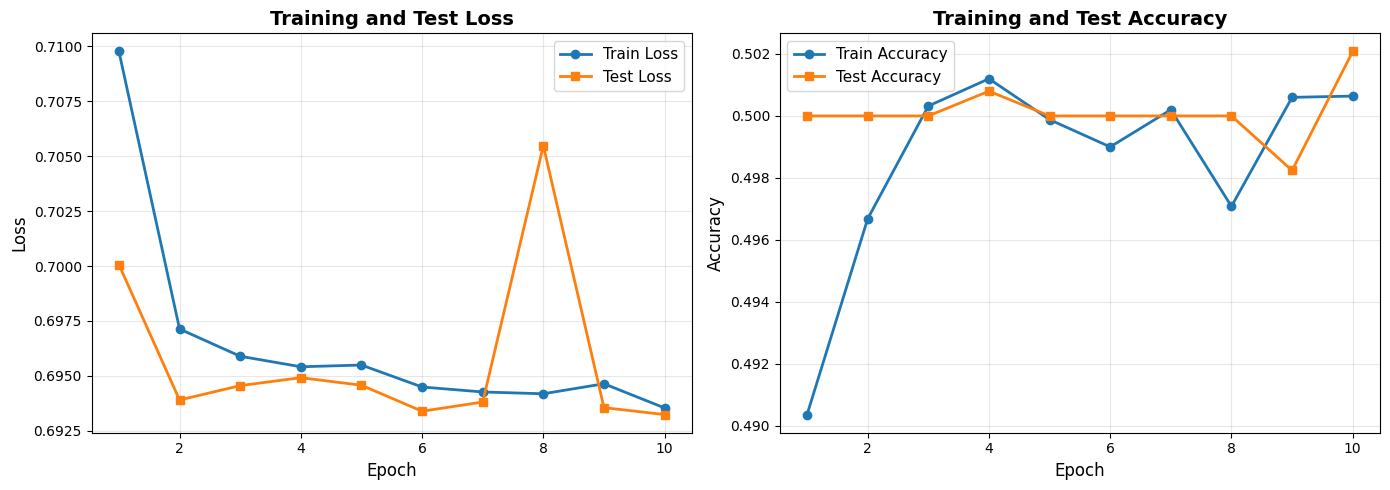

Final Train Accuracy: 0.5006
Final Test Accuracy: 0.5021


In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(
    range(1, NUM_EPOCHS + 1), train_losses, marker="o", label="Train Loss", linewidth=2
)
axes[0].plot(
    range(1, NUM_EPOCHS + 1), test_losses, marker="s", label="Test Loss", linewidth=2
)
axes[0].set_xlabel("Epoch", fontsize=12)
axes[0].set_ylabel("Loss", fontsize=12)
axes[0].set_title("Training and Test Loss", fontsize=14, fontweight="bold")
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(
    range(1, NUM_EPOCHS + 1),
    train_accuracies,
    marker="o",
    label="Train Accuracy",
    linewidth=2,
)
axes[1].plot(
    range(1, NUM_EPOCHS + 1),
    test_accuracies,
    marker="s",
    label="Test Accuracy",
    linewidth=2,
)
axes[1].set_xlabel("Epoch", fontsize=12)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].set_title("Training and Test Accuracy", fontsize=14, fontweight="bold")
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"Final Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")

In [46]:
def predict_sentiment(model, text, vocab, device, max_length=200):
    model.eval()
    sequence = text_to_sequence(text, vocab, max_length)
    sequence_tensor = torch.tensor(sequence, dtype=torch.long).unsqueeze(0).to(device)

    # Make prediction
    with torch.no_grad():
        output = model(sequence_tensor)
        probabilities = torch.softmax(output, dim=1)
        prediction = output.argmax(dim=1).item()
        confidence = probabilities[0][prediction].item()

    sentiment = "Positive" if prediction == 1 else "Negative"

    return sentiment, confidence


# Test on custom reviews
test_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the plot was engaging.",
    "Terrible movie. Waste of time and money. I would not recommend it to anyone.",
    "The film had its moments but overall it was quite disappointing.",
    "An absolute masterpiece! One of the best movies I've ever seen.",
    "Boring and predictable. I fell asleep halfway through.",
]

print("Custom Review Predictions:")
print("=" * 80)

for i, review in enumerate(test_reviews, 1):
    sentiment, confidence = predict_sentiment(model, review, vocab, device)
    print(f"\n{i}. Review: {review}")
    print(f"   Prediction: {sentiment} (Confidence: {confidence:.4f})")

Custom Review Predictions:

1. Review: This movie was absolutely fantastic! The acting was superb and the plot was engaging.
   Prediction: Negative (Confidence: 0.5005)

2. Review: Terrible movie. Waste of time and money. I would not recommend it to anyone.
   Prediction: Negative (Confidence: 0.5005)

3. Review: The film had its moments but overall it was quite disappointing.
   Prediction: Negative (Confidence: 0.5005)

4. Review: An absolute masterpiece! One of the best movies I've ever seen.
   Prediction: Negative (Confidence: 0.5005)

5. Review: Boring and predictable. I fell asleep halfway through.
   Prediction: Negative (Confidence: 0.5005)


### Poor Performance

Due to the limitations of simple RNNs, such as difficulty in capturing long-term dependencies.